In [39]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from bloch_schrodinger.potential import Potential, create_parameter
from bloch_schrodinger.solver import Solver
from bloch_schrodinger.plotting import plot_cuts, plot_eigenvector, energy_levels

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x', ylabel='y'>)

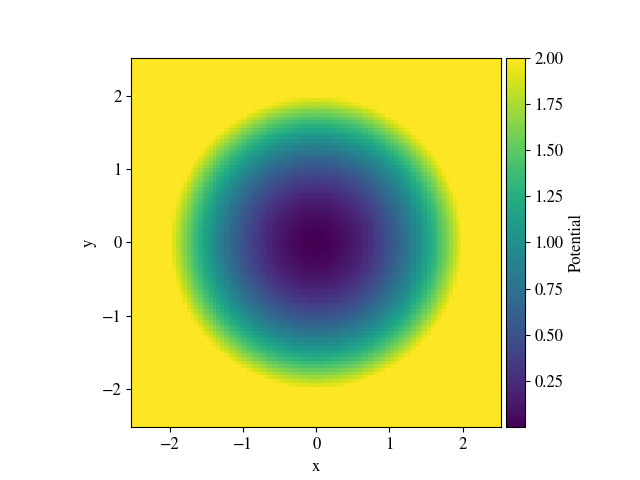

In [40]:
omega = create_parameter("omega", np.linspace(1,10, 20))
m = 1

well = Potential(
    [[5,0],[0,5]],
    resolution=(100,100),
    endpoint=True,
    v0 = 0
)

well.set(omega**2 *2)
well.circle(
    center=(0,0),
    radius=2,
    value = (well.x**2+well.y**2)*omega**2/2
)

%matplotlib widget
well.plot()

In [41]:
solv = Solver(
    well, 0.5
)

eigva, eigve = solv.solve(5)

100%|██████████| 20/20 [00:08<00:00,  2.50it/s]


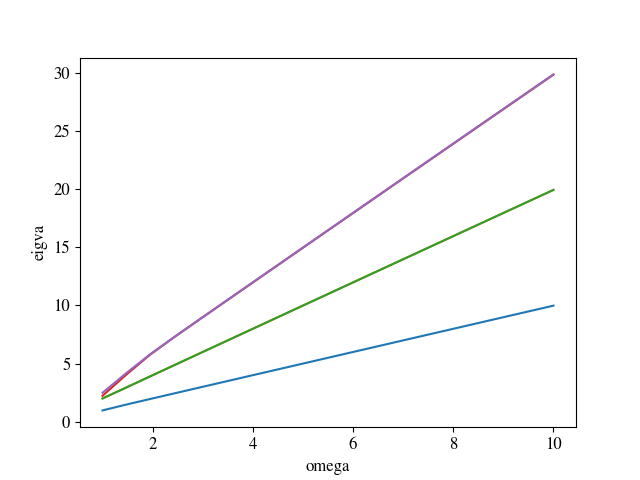

In [42]:
plot_cuts(eigva, 'omega')
plt.show()

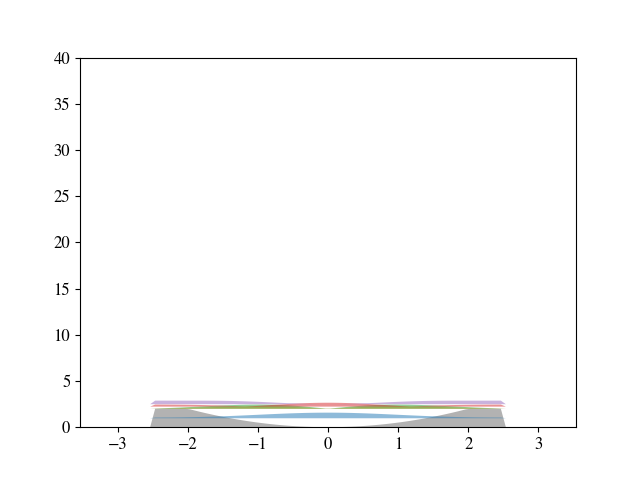

In [47]:
energy_levels(
    eigva, abs(eigve), well, ymax = 40
)
plt.show()

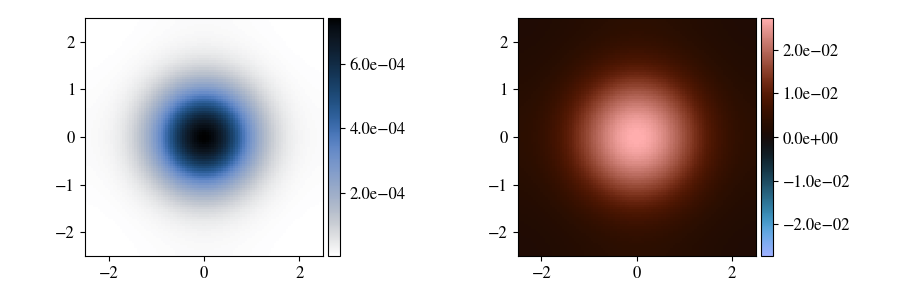

In [44]:
plot_eigenvector(
    [[abs(eigve)**2, eigve.real]],
    [[well, well]],
    [['amplitude', 'real']]
)
plt.show()